<h1><center> DM ASSIGNEMNT (Attrition) </center></h1>

<h2>1) Understanding requirements:</h2>
<h4 style="padding-left: 10px">a) Business Requirements Understanding:</h4><br>
<strong style="padding-left: 30px">i) Aim:</strong><br>
<span style="padding-left: 30px">The aim of this exercise is to "Analyze and Build models for Predicting (Employee) Attrition".</span>

<strong style="padding-left: 30px">ii) Problem to be solved:</strong><br>
<span style="padding-left: 30px">Given the data set predit whethere an amployee will leave the organization or not based on the give attributes</span>

<!-- <h4 style="padding-left: 10px">a) Data Understanding: (Data Acquisition)</h4>
<span style="padding-left: 30px">Data Understanding has the following steps being taken<br></span>
<span style="padding-left: 30px">a) Assesing the Size of dataset<br></span>
<span style="padding-left: 30px">b) Getting attributes and their types<br></span>
<span style="padding-left: 30px">c) Filtering out the Qualitative attributes<br></span>
<span style="padding-left: 30px">d) Getting quantative attributes<br></span>
<span style="padding-left: 30px">Balanced or imbalanced dataset</span> -->


<label>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</label>

<h2>2) Aquiring Data and superficial analysis (Data Acquisition)</h2>

<h5>a) How many files?</h5>
The given data set has one file 'Attrition.csv'.
The Following set of codes read and load the file contents into Pandas dataframe

<h5>b) Reading the data set and consoling the top two rows</h5>

In [339]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prettytable import PrettyTable

#Importing the DecisionTreeClassifier and LogisticRegressionClassifier for model building
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# For Analyzing the models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


df = pd.read_csv('Attrition.csv')
df.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7


<h5>c) Assesing the Size of dataset (rows x columns)</h5>

In [5]:
df.shape

(1470, 33)

<h5>d) Getting attributes and their types (Whether Numeric Or Character)</h5>

<h6>Understanding:</h6>
<div>df.dtypes classifies the columns as type Numerical or Object.</div>
<div style="padding-left: 20px"><strong>int64 : </strong>Represents Numeric type attributes</div>
<div style="padding-left: 20px"><strong>object: </strong>Represents string type attributes</div

In [360]:
ptbl = PrettyTable()

# Print some metrics in a table
for attribute in df.columns:    
    ptbl.field_names = ["Attribute Name", "Data Type"]
    ptbl.add_row([attribute, df[attribute].dtype])
    
print(ptbl)

+--------------------------+-----------+
|      Attribute Name      | Data Type |
+--------------------------+-----------+
|        Attrition         |   object  |
|           Age            |   int64   |
|      BusinessTravel      |   object  |
|        DailyRate         |   int64   |
|        Department        |   object  |
|     DistanceFromHome     |   object  |
|        Education         |   object  |
|      EducationField      |   object  |
|      EmployeeNumber      |   int64   |
| EnvironmentSatisfaction  |   int64   |
|          Gender          |   object  |
|        HourlyRate        |   object  |
|      JobInvolvement      |   int64   |
|         JobLevel         |   int64   |
|         JobRole          |   object  |
|     JobSatisfaction      |   int64   |
|      MaritalStatus       |   object  |
|      MonthlyIncome       |   object  |
|       MonthlyRate        |   object  |
|    NumCompaniesWorked    |   int64   |
|          Over18          |   object  |
|         OverTi

<h5>d.i) Filtering out the Qualitative attributes</h5>
Pandas "df.dtypes" if is an "object" means it has string values, hence these can be classified as Qualitative attributes

In [7]:
# Creating a copy of dataset
dfCopy = df.copy()

# Replace the NAN with python NaN
dfCopy.replace("NAN", np.NaN,inplace=True)

# Dropping the NaN values for analysis using pandas dropna()
dfCopy.dropna (inplace = True)

qualitative_features = [feature for feature in dfCopy.columns if dfCopy[feature].dtypes == 'object']
print("Qualitiative Features: ", len(qualitative_features))
print(qualitative_features)
print('----------------------------------------')

for column in qualitative_features:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(dfCopy[column].unique()))

        # Diplays count of each value of the column
        print(dfCopy[column].value_counts())

        print("_________________________________________________________________")

Qualitiative Features:  14
['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'HourlyRate', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'Over18', 'OverTime']
----------------------------------------
Attrition : ['Yes' 'No']
No     1214
Yes     235
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1027
Travel_Frequently     274
Non-Travel            148
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    948
Sales                     438
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
DistanceFromHome : ['1' '8' '2' '3' '24' '23' '16' '15' '26' '19' '21' '5' '11' '9' 

<strong>Explanation:</strong><br>
The Qualitative data types are as follows. There are total 14 attributes that fall under the this category. We extracted them based on the datatype assigned by pandas library as 'object'. Hence, these can be categorical, discrete, binary etc type of data<br>
<table style="border: 1px solid; width: 100%">
    <tr>
        <td style="text-align: left; border: 1px solid">'Attrition'</td>
        <td style="text-align: left; border: 1px solid">'BusinessTravel'</td>
        <td style="text-align: left; border: 1px solid">'Department'</td>
        <td style="text-align: left; border: 1px solid">'DistanceFromHome'</td>
        <td style="text-align: left; border: 1px solid">'Education'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'EducationField'</td>
        <td style="text-align: left; border: 1px solid">'Gender'</td>
        <td style="text-align: left; border: 1px solid">'HourlyRate'</td>
        <td style="text-align: left; border: 1px solid">'JobRole'</td>
        <td style="text-align: left; border: 1px solid">'MaritalStatus'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'MonthlyIncome'</td>
        <td style="text-align: left; border: 1px solid">'MonthlyRate'</td>
        <td style="text-align: left; border: 1px solid">'Over18'</td>
        <td style="text-align: left; border: 1px solid">'OverTime'</td>
    </tr>
</table>

In [9]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="FilesForNotebook/Qualitative_attributes.png")

<h5>d.ii) Getting quantative attributes</h5><br>

In [8]:
quantitaive_features = [feature for feature in dfCopy.columns if dfCopy[feature].dtypes == 'int64']

print("Quantitative Features: ", len(quantitaive_features))
print(quantitaive_features)
print("-----------------------------------")

for column in quantitaive_features:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(dfCopy[column].unique()))

        # Diplays count of each value of the column
        print(dfCopy[column].value_counts())

        print("_________________________________________________________________")

Quantitative Features:  19
['Age', 'DailyRate', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
-----------------------------------
Age : [41 49 37 33 27 32 59 30 38 35 29 31 34 28 22 53 24 36 21 42 44 46 43 50
 26 48 55 45 56 23 51 40 54 58 20 25 19 39 57 52 47 18 60]
35    78
34    74
31    69
29    67
36    67
32    61
30    60
33    58
40    57
38    57
37    49
28    48
27    47
42    46
39    41
45    40
41    40
26    38
46    33
44    33
43    31
50    29
24    26
25    25
49    24
47    23
55    22
51    19
53    19
52    18
54    18
48    18
22    15
56    14
58    14
23    13
21    12
20    11
59    10
19     8
18     8
60     5
57     4
Name: Age, dtype: int64
_____

In [10]:
Image(url="FilesForNotebook/Quantitative_attributes.png")

<strong>Explanation:</strong><br>
The Qaunitative data types are as follows. There are total 19 attributes that fall under the quanititaive category. We extracted them based on their datatype assigned by pandas library as 'int64'.<br>
<table style="border: 1px solid; width: 100%">
    <tr>
        <td style="text-align: left; border: 1px solid">'Age'</td>
        <td style="text-align: left; border: 1px solid">'DailyRate'</td>
        <td style="text-align: left; border: 1px solid">'EmployeeNumber'</td>
        <td style="text-align: left; border: 1px solid">'EnvironmentSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'JobInvolvement'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'JobLevel'</td>
        <td style="text-align: left; border: 1px solid">'JobSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'NumCompaniesWorked'</td>
        <td style="text-align: left; border: 1px solid">'PercentSalaryHike'</td>
        <td style="text-align: left; border: 1px solid">'PerformanceRating'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'RelationshipSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'StockOptionLevel'</td>
        <td style="text-align: left; border: 1px solid">'TotalWorkingYears'</td>
        <td style="text-align: left; border: 1px solid">'TrainingTimesLastYear'</td>
        <td style="text-align: left; border: 1px solid">'WorkLifeBalance'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'YearsAtCompany'</td>
        <td style="text-align: left; border: 1px solid">'YearsInCurrentRole'</td>
        <td style="text-align: left; border: 1px solid">'YearsSinceLastPromotion'</td>
        <td style="text-align: left; border: 1px solid">'YearsWithCurrManager'</td>
    </tr>
</table>

<h5>e) Dataset - Balance or Imbalanced</h5>

<label>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</label>

<h2>3) Understanding Data</h2>

<h5>a) How many features?</h5>

In [361]:
len(df.columns)

33

<label>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</label>

<h3>2) Preparing Data</h3>

<h5 style="padding-left: 15px">a) Identifying Missing Data, Inconsistent Data</h5>
<span style="padding-left: 30px">Looking at the data set we can find Data set contains NAN, this step aims to figure the amount of Missing Data we are having in the data set</span>

In [11]:
# Creating a copy of dataset
dfCopy = df.copy()

# Replace the NAN with python NaN
dfCopy.replace("NAN", np.NaN,inplace=True)

totalRows = len(dfCopy.index);

for column in dfCopy:

        # Lists all coloumns and unique value in them
        if (dfCopy[column].isna().sum()) :
            print(str(column))
            print('    NAN count: ' + str(dfCopy[column].isna().sum()))
            print('    NAN ratio: ' + str(round((dfCopy[column].isna().sum() / totalRows), 3)))
            print('')



DistanceFromHome
    NAN count: 5
    NAN ratio: 0.003

Education
    NAN count: 1
    NAN ratio: 0.001

HourlyRate
    NAN count: 5
    NAN ratio: 0.003

MonthlyIncome
    NAN count: 5
    NAN ratio: 0.003

MonthlyRate
    NAN count: 5
    NAN ratio: 0.003



<strong>Analysis:</strong><br>
<label>From the above analysis we find that the "NAN" count is lesser than 1% for the data set, hence we can:</label>
<ol>
    <li>Drop the NAN records</li>
    <li>Fill the NAN values with the mean, mode or median value, but this needs further analysis on data distribution</li>
    <li>Use most probable value to fill in</li>
</ol>


<label>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</label>

<h3>2.1) Analyzing Data</h3>

We will now try to analyse the distribution of the data in following ways:<br>
1) Categorical Data -- Count Plot / Pie charts<br>
2) Continuous Data -- Histogram distribution

<strong>Note:</strong><br>
We will not be plotting for the "EmployeeNumber" as it is an id, it hardly contributes anything for the decision making 

<h5 style="padding-left: 15px">1) Count Plots (for categorical attributes)</h5>

Following attributes belong to the Categorical type in the broad aspect:

<table style="border: 1px solid; width: 100%; font-size: 1.3rem">
    <tr>
        <td style="text-align: left; border: 1px solid">'Attrition'</td>
        <td style="text-align: left; border: 1px solid">'BusinessTravel'</td>
        <td style="text-align: left; border: 1px solid">'Department'</td>
        <td style="text-align: left; border: 1px solid">'Education'</td>
        <td style="text-align: left; border: 1px solid">'EducationField'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'Gender'</td>
        <td style="text-align: left; border: 1px solid">'JobRole'</td>
        <td style="text-align: left; border: 1px solid">'MaritalStatus'</td>
        <td style="text-align: left; border: 1px solid">'Over18'</td>
        <td style="text-align: left; border: 1px solid">'OverTime'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'EnvironmentSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'JobInvolvement'</td>
        <td style="text-align: left; border: 1px solid">'JobLevel'</td>
        <td style="text-align: left; border: 1px solid">'JobSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'NumCompaniesWorked'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'PercentSalaryHike'</td>
        <td style="text-align: left; border: 1px solid">'PerformanceRating'</td>
        <td style="text-align: left; border: 1px solid">'RelationshipSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'StockOptionLevel'</td>
        <td style="text-align: left; border: 1px solid">'TrainingTimesLastYear'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'WorkLifeBalance'</td>
    </tr>
</table>

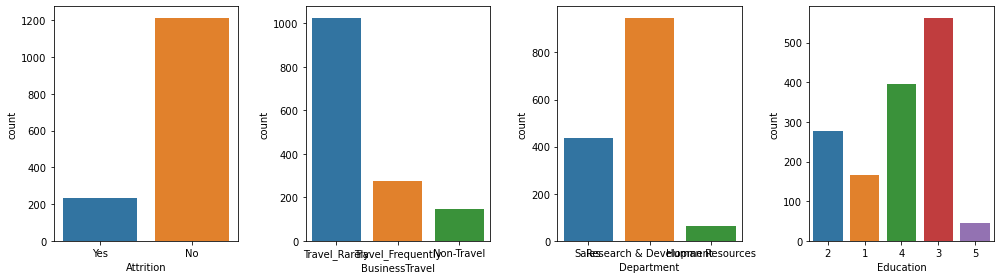

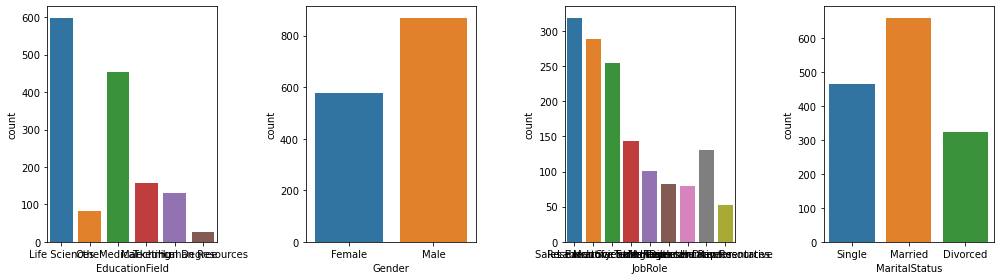

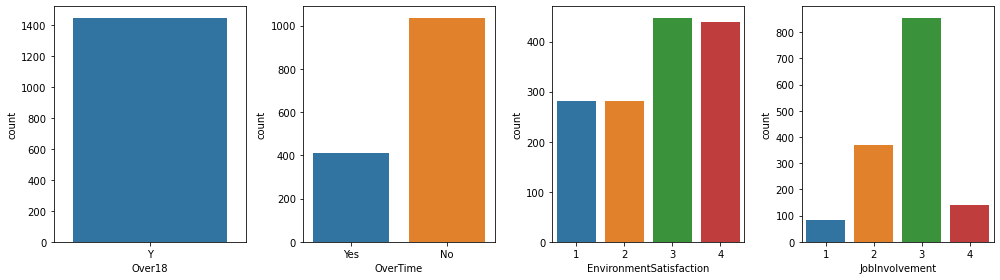

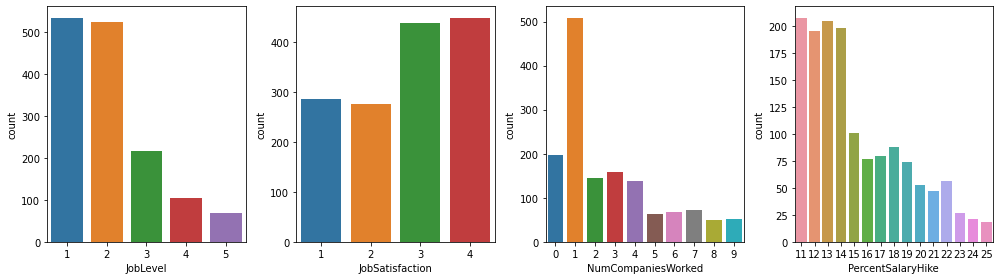

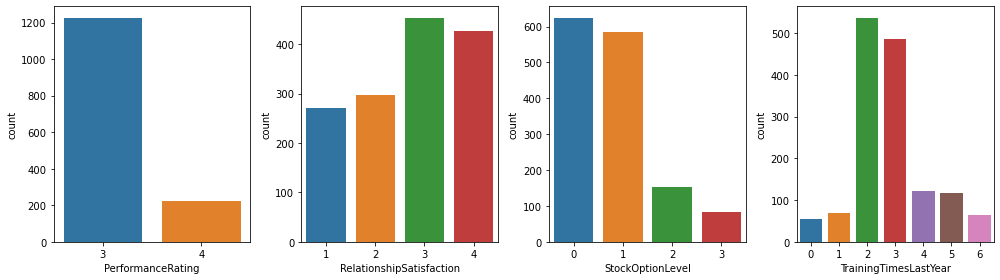

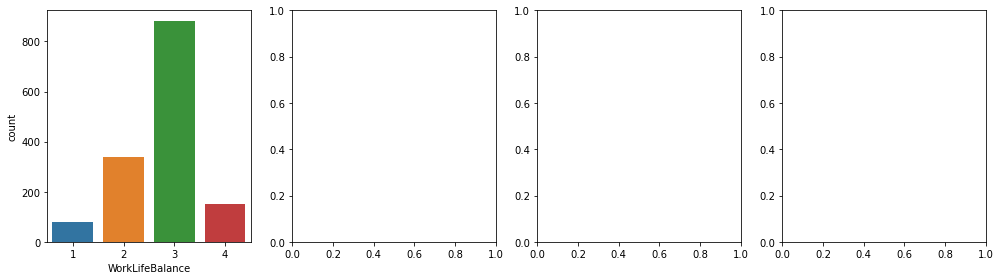

In [12]:
# Creating a copy of dataset
dfAnalytic = df.copy()

# Replace the NAN with python NaN
dfAnalytic.replace("NAN", np.NaN,inplace=True)

# Dropping the NaN values for analysis using pandas dropna()
dfAnalytic.dropna (inplace = True)

plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

categoricalAttr = ['Attrition','BusinessTravel','Department','Education',
                   'EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime',
                   'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked',
                   'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
                   'TrainingTimesLastYear','WorkLifeBalance']

index = 0
graphsInARow = 4

for attr in categoricalAttr:
    
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
        
    sns.countplot(x=attr, data=dfAnalytic, ax = ax[index % graphsInARow])
    index = index + 1
    
    if (index % graphsInARow == 0):
        plt.show()



<h5 style="padding-left: 15px">2) Histogram Distribution (for Continuous Attributes)</h5>

Hostogram plot is best suited to understand the spread for continuous data. Following attributes belong to the continuous type in the broad aspect:
<table style="border: 1px solid; width: 100%; font-size: 1.3rem">
    <tr>
        <td style="text-align: left; border: 1px solid">'DistanceFromHome'</td>
        <td style="text-align: left; border: 1px solid">'HourlyRate'</td>
        <td style="text-align: left; border: 1px solid">'MonthlyIncome'</td>
        <td style="text-align: left; border: 1px solid">'MonthlyRate'</td>
        <td style="text-align: left; border: 1px solid">'Age'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'DailyRate'</td>
        <td style="text-align: left; border: 1px solid">'TotalWorkingYears'</td>
        <td style="text-align: left; border: 1px solid">'YearsAtCompany'</td>
        <td style="text-align: left; border: 1px solid">'YearsInCurrentRole'</td>
        <td style="text-align: left; border: 1px solid">'YearsSinceLastPromotion'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'YearsWithCurrManager'</td>
    </tr>
</table>

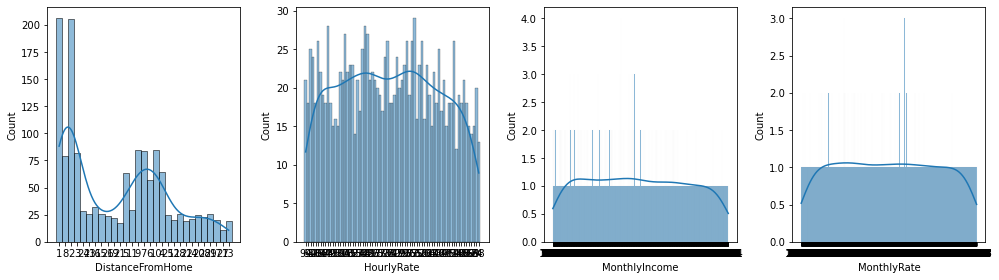

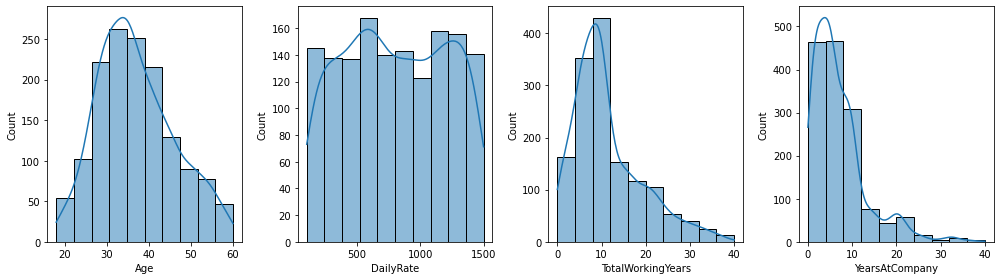

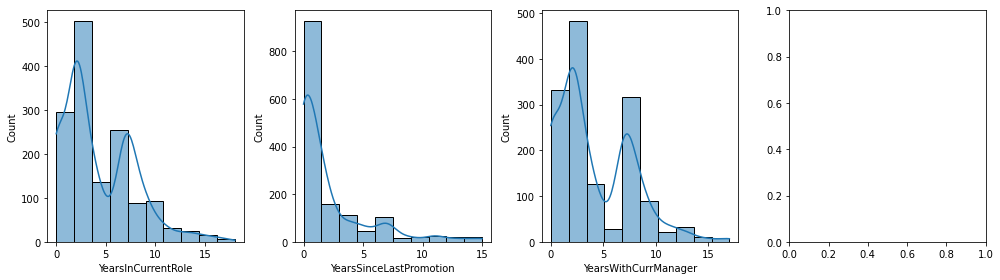

In [212]:
plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

continuosAttr = ['DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','Age','DailyRate','TotalWorkingYears',
                 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

# continuosAttr = ['DistanceFromHome','HourlyRate','Age','DailyRate','TotalWorkingYears','YearsAtCompany',
#                  'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

index = 0
graphsInARow = 4

# MonthlyIncome MonthlyRate

for attr in continuosAttr:
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
    sns.histplot(data=dfAnalytic[attr], bins=10, kde=True, ax = ax[index % graphsInARow])
    index = index + 1
    if (index % graphsInARow == 0):
        plt.show()


<h3>2.2) Doing Correlation Analysis</h3>

<h5 style="padding-left: 15px">1) Constructing correlation matrix</h5>

In [41]:
dfAnalytic.corr()

,Age,DailyRate,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.018595,-0.016191,0.013120,0.031520,0.508991,-0.008046,0.299032,0.011358,0.004064,0.050937,0.036041,0.678570,-0.017556,-0.023454,0.306970,0.211695,0.212149,0.197801
DailyRate,0.018595,1.000000,-0.046025,0.018045,0.044653,0.005182,0.034205,0.037415,0.020069,0.001524,0.005784,0.041631,0.015937,0.000367,-0.034566,-0.032436,0.012727,-0.032000,-0.026304
EmployeeNumber,-0.016191,-0.046025,1.000000,0.021356,-0.007447,-0.022431,-0.041935,0.000426,-0.012135,-0.022069,-0.072962,0.065589,-0.015461,0.023532,0.011379,-0.013417,-0.010080,-0.004685,-0.010925
EnvironmentSatisfaction,0.013120,0.018045,0.021356,1.000000,-0.009120,0.004166,-0.010455,0.010154,-0.034895,-0.033485,0.010273,0.010760,0.000408,-0.020474,0.027877,0.004598,0.018866,0.018088,-0.005381
JobInvolvement,0.031520,0.044653,-0.007447,-0.009120,1.000000,-0.010022,-0.017527,0.016611,-0.018978,-0.034795,0.036767,0.019357,-0.004773,-0.016096,-0.013510,-0.020052,0.011913,-0.023461,0.026058
JobLevel,0.508991,0.005182,-0.022431,0.004166,-0.010022,1.000000,-0.001137,0.143753,-0.030713,-0.017286,0.019000,0.014226,0.783502,-0.018009,0.038183,0.533061,0.389610,0.352281,0.375622
JobSatisfaction,-0.008046,0.034205,-0.041935,-0.010455,-0.017527,-0.001137,1.000000,-0.059695,0.023218,0.005444,-0.013921,0.012179,-0.020395,-0.007209,-0.019071,-0.002513,-0.004101,-0.021603,-0.030543
NumCompaniesWorked,0.299032,0.037415,0.000426,0.010154,0.016611,0.143753,-0.059695,1.000000,-0.012008,-0.017609,0.054743,0.027594,0.236563,-0.063706,-0.007538,-0.118707,-0.090124,-0.036409,-0.111084
PercentSalaryHike,0.011358,0.020069,-0.012135,-0.034895,-0.018978,-0.030713,0.023218,-0.012008,1.000000,0.774250,-0.033223,0.007584,-0.014143,-0.005311,-0.001820,-0.028128,0.002248,-0.010188,-0.006360
PerformanceRating,0.004064,0.001524,-0.022069,-0.033485,-0.034795,-0.017286,0.005444,-0.017609,0.774250,1.000000,-0.027628,0.003199,0.009932,-0.015690,0.003150,0.008032,0.038384,0.024760,0.026655


<h5 style="padding-left: 15px">2) Constructing Heat Mapp off the correlation</h5>

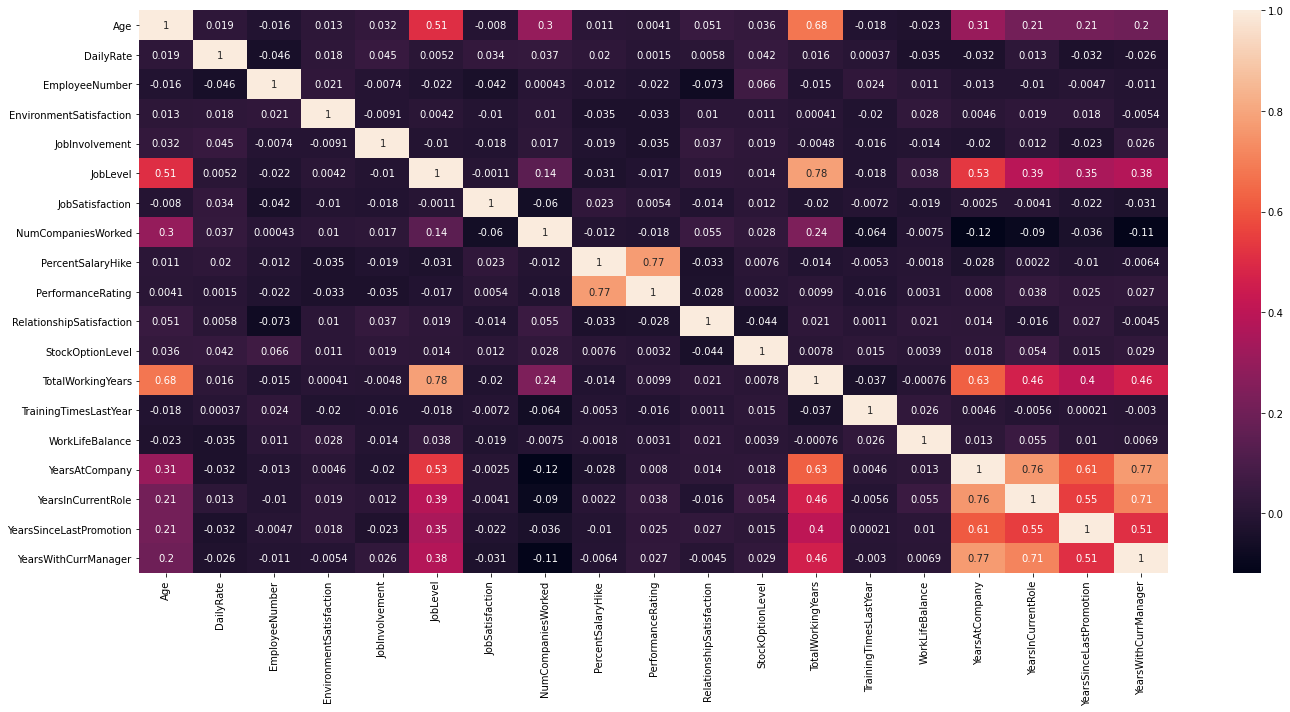

In [46]:
# Picturing attribute correlation
plt.figure(figsize=(20,10))  #14in by 14in
sns.heatmap(dfAnalytic.corr(), annot=True)

<h5>a) Converting categorical attributes to numeric values </h5>

In [241]:
# Creating a copy of dataset
dfModel = df.copy()

# Replace the NAN with python NaN
dfModel.replace("NAN", np.NaN,inplace=True)

# Dropping the NaN values for analysis using pandas dropna()
dfModel.dropna (inplace = True)

print('---------Before-------------')
print(dfModel.head(10))

#Transform discrete/categorical attributes into numerical columns
from sklearn.preprocessing import LabelEncoder

for attribute in dfModel.columns:
        if dfModel[attribute].dtype == np.number:
            continue
        dfModel[attribute] = LabelEncoder().fit_transform(dfModel[attribute])

print('---------after-------------')
print(dfModel.head(10))
# Display the data
# dfModel.head(10)

---------Before-------------
   Attrition  Age     BusinessTravel  DailyRate              Department  \
0        Yes   41      Travel_Rarely       1102                   Sales   
1         No   49  Travel_Frequently        279  Research & Development   
2        Yes   37      Travel_Rarely       1373  Research & Development   
3         No   33  Travel_Frequently       1392  Research & Development   
4         No   27      Travel_Rarely        591  Research & Development   
5         No   32  Travel_Frequently       1005  Research & Development   
6         No   59      Travel_Rarely       1324  Research & Development   
7         No   30      Travel_Rarely       1358  Research & Development   
8         No   38  Travel_Frequently        216  Research & Development   
10        No   35      Travel_Rarely        809  Research & Development   

   DistanceFromHome Education EducationField  EmployeeNumber  \
0                 1         2  Life Sciences               1   
1                

<strong>Explanation:</strong><br>
1) We have the target attribute at the begining of the dataset<br>
2) We can see all the categorical variables are now converted to numeric type to help build model easily

<h5>------------------------------------------------------------------------------------ MODELLING --------------------------------------------------------------------------------------------------</h5>

<h2>7) Building the Model (Modelling)</h2>

<h5>a) Splitting VERTICALLY into Pedictor and non-predictor attributes for training the model</h5>

In [186]:
X = dfModel.iloc[:, 1:dfModel.shape[1]].values 
Y = dfModel.iloc[:, 0].values

print("List of other attribute (INPUT ATTRIBUTE) values: ")
print(X)
print("--------------------------------------")
print("List of outcome (OUTPUT ATTRIBUTE) value: ")
print(Y)
print("--------------------------------------")

List of other attribute (INPUT ATTRIBUTE) values: 
[[ 23   2 617 ...   4   0   5]
 [ 31   1 111 ...   7   1   7]
 [ 19   2 796 ...   0   0   0]
 ...
 [  9   2  39 ...   2   0   3]
 [ 31   1 573 ...   6   0   8]
 [ 16   2 334 ...   3   1   2]]
--------------------------------------
List of outcome (OUTPUT ATTRIBUTE) value: 
[1 0 1 ... 0 0 0]
--------------------------------------


<h5>b) Splitting the dataset HORIZONTALLY into traiing and testing dataset 80-20</h5>

The split percentages most commonly used are:

Train: 80%, Test: 20%<br>
Train: 67%, Test: 33%<br>
Train: 50%, Test: 50%<br>
        
Rereference: [https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/]

We will go for the 80-20 split, as more the data we train better the accuracy 

In [72]:
# Splitting dataset to 80% Training dataset & 20% Testing dataset
from sklearn.model_selection import train_test_split

# Mentioning the training size as 80%
x_training, x_testing, y_training, y_testing = train_test_split(X, Y, train_size = 0.80, random_state = 0)

print('-------------TRAINING---------------')
print('x_training.shape: ', x_training.shape)
print('y_training.shape: ', y_training.shape)

print('\n-------------TESTING----------------')
print('x_testing.shape: ', x_testing.shape)
print('y_testing.shape: ', y_testing.shape)


-------------TRAINING---------------
x_training.shape:  (1159, 32)
y_training.shape:  (1159,)

-------------TESTING----------------
x_testing.shape:  (290, 32)
y_testing.shape:  (290,)


<h5>c) Preparing the model</h5>

<h6>c.i) Building Model using - The Decision Tree  Classifier</h6>

[Text(421.99543816388467, 210.645, 'X[20] <= 0.322\nentropy = 0.654\nsamples = 1159\nvalue = [964, 195]'),
 Text(195.78158194233689, 197.055, 'X[8] <= 0.966\nentropy = 0.496\nsamples = 827\nvalue = [737, 90]'),
 Text(83.57298937784522, 183.465, 'X[18] <= 0.275\nentropy = 0.695\nsamples = 171\nvalue = [139, 32]'),
 Text(78.83125948406678, 169.875, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(88.31471927162367, 169.875, 'X[31] <= 6.382\nentropy = 0.74\nsamples = 153\nvalue = [121, 32]'),
 Text(53.34446130500759, 156.285, 'X[13] <= 4.56\nentropy = 0.829\nsamples = 107\nvalue = [79, 28]'),
 Text(26.07951441578149, 142.695, 'X[31] <= 4.749\nentropy = 0.971\nsamples = 45\nvalue = [27, 18]'),
 Text(21.337784522003037, 129.10500000000002, 'X[23] <= 0.019\nentropy = 0.952\nsamples = 43\nvalue = [27, 16]'),
 Text(9.483459787556905, 115.515, 'X[13] <= 1.823\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(4.741729893778452, 101.925, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),


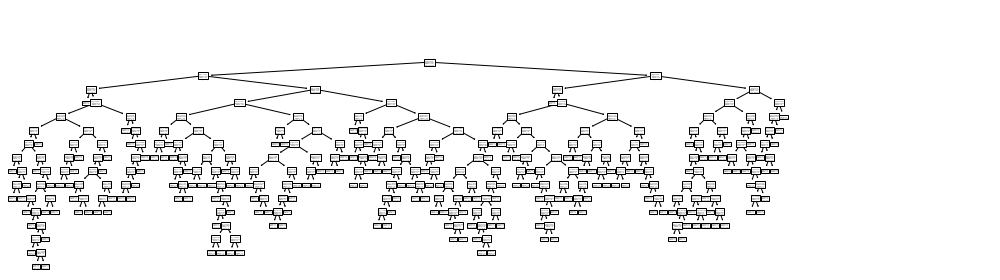

In [218]:
# Creating the decisionTreeClassifier
dTreeClf = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random")
dTreeClf = dTreeClf.fit(x_training, y_training)

# To Plot the decision tree
tree.plot_tree(dTreeClf)

<h6>c.ii) Building Model using - The Logic Regression Classifier</h6>

In [228]:
# Creating the decisionTreeClassifier
lRegClf = LogisticRegression(random_state=0)
lRegClf = lRegClf.fit(x_training, y_training)

# Getting the predictions
predictions = lRegClf.predict(x_testing)

# Get the score: mean accuracy of the test data
score = lRegClf.score(x_testing, y_testing)
print(score)

0.8551724137931035


C:\Users\685239\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h5>------------------------------------------------------------------------------------ EVALUATIONS --------------------------------------------------------------------------------------------------</h5>

<h2>8. Evaluating Model</h2>

<h3>a) Evaluating - Decision Tree Technique</h3>

<h4>i) Classification Report</h4>

In [261]:
# Classification report for Decision Tree
print( classification_report(y_testing, dTreeClf.predict(x_testing)) )

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       250
           1       0.29      0.35      0.32        40

    accuracy                           0.79       290
   macro avg       0.59      0.61      0.60       290
weighted avg       0.81      0.79      0.80       290



<h4>ii) Plotting Confusion Matrix</h4>

Text(0.5, 353.19999999999993, 'Predicted label')

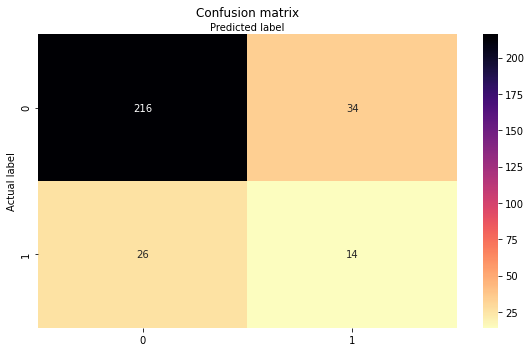

In [333]:
# Setting Graph Size
plt.rcParams["figure.figsize"] = [8.00, 5.0]
plt.rcParams["figure.autolayout"] = True

## Confusion Matrix
cnf_matrix_tree = confusion_matrix(y_testing, dTreeClf.predict(x_testing))
class_names = [0, 1] # name  of classes [0 = No, 1 = Yes]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_tree), annot=True, cmap='magma_r' ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h4>iii) F1 Score</h4>

In [342]:
# f1_score(y_true, y_pred, average='macro')
f1 = f1_score(y_testing, dTreeClf.predict(x_testing))

#Print some metrics in a table
ptbl = PrettyTable()
ptbl.field_names = ["F1Score"]
ptbl.add_row([round(f1, 3)])
print(ptbl)

+---------+
| F1Score |
+---------+
|  0.318  |
+---------+


<h4>iv) Decision Boundary</h4>

In [346]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = x_training[:, 0].min() - 1, x_training[:, 0].max() + 1
y_min, y_max = x_training[:, 1].min() - 1, x_training[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = dTreeClf.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = x_testing[:, 0].min() - 1, x_testing[:, 0].max() + 1
y_min, y_max = x_testing[:, 1].min() - 1, x_testing[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = dTreeClf.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(x_training[:, 0], x_training[:, 1], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(x_testing[:, 0], x_testing[:, 1], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 32 and input n_features is 2 

<h3>b) Evaluating - Logistic Regression Technique</h3>

<h4>i) Classification Report</h4>

In [264]:
# Classification report for Logistic Regreession
print( classification_report(y_testing, lRegClf.predict(x_testing)) )

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       250
           1       0.40      0.10      0.16        40

    accuracy                           0.86       290
   macro avg       0.64      0.54      0.54       290
weighted avg       0.81      0.86      0.82       290



<h4>ii) Plotting Confusion Matrix</h4>

Text(0.5, 353.19999999999993, 'Predicted label')

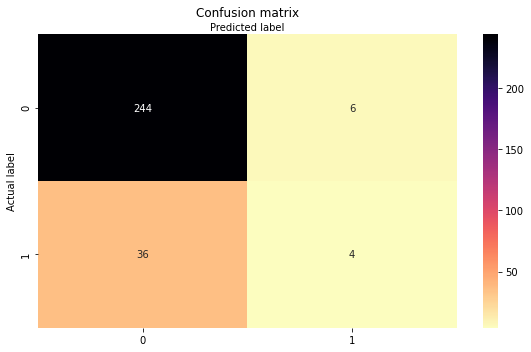

In [335]:
# Setting Graph Size
plt.rcParams["figure.figsize"] = [8.00, 5.0]
plt.rcParams["figure.autolayout"] = True

## Confusion Matrix
cnf_matrix_tree = confusion_matrix(y_testing, lRegClf.predict(x_testing))
class_names = [0, 1] # name  of classes [0 = No, 1 = Yes]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_tree), annot=True, cmap="magma_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h4>iii) F1 Score</h4>

In [343]:
# f1_score(y_true, y_pred, average='macro')
f1 = f1_score(y_testing, lRegClf.predict(x_testing))

#Print some metrics in a table
ptbl = PrettyTable()
ptbl.field_names = ["F1Score"]
ptbl.add_row([round(f1, 3)])
print(ptbl)

+---------+
| F1Score |
+---------+
|   0.16  |
+---------+


<h4>iv) Decision Boundary</h4>

<h5>------------------------------------------------------------------------------------ EVALUATIONS --------------------------------------------------------------------------------------------------</h5>

<h5>b) Calculating Info Gain</h5>

In [118]:
# Returns importances of attributes (higher value better info gain).
importances = pd.DataFrame({'Attributes':dfModel.iloc[:, 1:dfModel.shape[1]].columns,
                            'Importance%':np.round(forest.feature_importances_,3)*100})
importances = importances.sort_values('Importance%',ascending=False).set_index('Attributes')
print('Number of attributes:', len(importances))
print('------------------------------------------')
importances

Number of attributes: 32
------------------------------------------


,Importance%
Attributes,
MonthlyIncome,6.4
Age,5.9
OverTime,5.5
EmployeeNumber,5.3
TotalWorkingYears,5.1
YearsAtCompany,4.9
MonthlyRate,4.5
HourlyRate,4.5
DistanceFromHome,4.5


<h5>c) Visualizing Info Gain</h5>

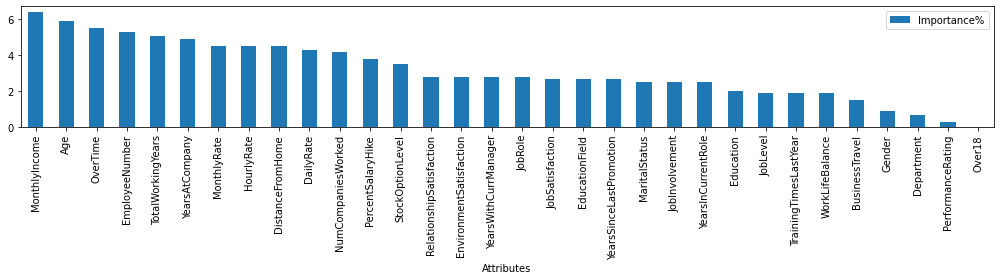

In [247]:
importances.plot.bar()